In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
sns.set(rc={"figure.figsize":(12,8)})

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("../../data/csv/Smarket.csv")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


### The Stock Market Data

In [3]:
df.columns.tolist()

['Year',
 'Lag1',
 'Lag2',
 'Lag3',
 'Lag4',
 'Lag5',
 'Volume',
 'Today',
 'Direction']

In [4]:
df.shape

(1250, 9)

In [5]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
df['Direction'].describe()

count     1250
unique       2
top         Up
freq       648
Name: Direction, dtype: object

In [7]:
# pairwise correlations
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


The correlations between the lag variables (previous days’) and today’s returns are close to zero.

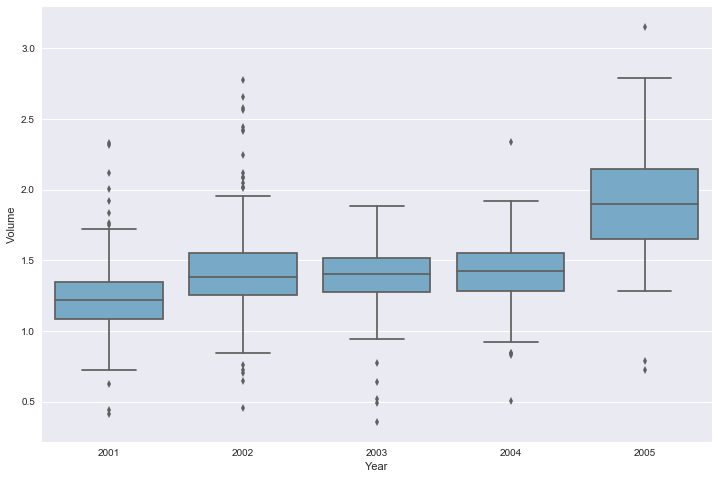

In [8]:
sns.boxplot(x=df['Year'], y=df['Volume'], palette=sns.color_palette("Blues", 1));

The average number of shares traded daily increased from 2001 to 2005.

## K-Nearest Neighbor

Direction = whether the market was Up or Down  
Lag1, Lag2 = percentage returns for the two previous trading days  

Predict Direction from Lag1 and Lag2:

In [9]:
model = KNeighborsClassifier(n_neighbors=3)

### Model Fit

Use the observations from 2001 to 2004 as training data and the observations from 2005 as testing data.

In [10]:
xtrain = df[df['Year'] != 2005][['Lag1', 'Lag2']]
xtest = df[df['Year'] == 2005][['Lag1', 'Lag2']]

ytrain = df[df['Year'] != 2005][['Direction']]
ytest = df[df['Year'] == 2005][['Direction']]

print xtrain.shape
print xtest.shape

(998, 2)
(252, 2)


In [11]:
model.fit(X=xtrain, y=ytrain)

/Users/divyanair/.pyenv/versions/2.7.14/envs/interview_env/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Model Accuracy

#### 1. Training Error

In [12]:
ypredTrain = model.predict(X=xtrain)
ypredTrain[:5]

array(['Up', 'Up', 'Down', 'Up', 'Up'], dtype=object)

In [13]:
np.mean(np.equal(ypredTrain, ytrain['Direction'].tolist()))

0.75450901803607218

#### 2. Testing Error

In [14]:
ypred = model.predict(X=xtest)
ypred[:5]

array(['Down', 'Down', 'Down', 'Up', 'Up'], dtype=object)

In [15]:
confusion_matrix(ytest, ypred, labels=["Down", "Up"])

array([[48, 63],
       [55, 86]])

In [16]:
np.mean(np.equal(ypred, ytest['Direction'].tolist()))

0.53174603174603174